# question2.ipynb - 展位分配建模（问题二）

In [24]:
# 一、环境设置与路径配置
import sys, os, warnings
warnings.filterwarnings("ignore")

# 项目根目录加入模块路径
PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), "../../"))
sys.path.append(PROJECT_ROOT)

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib import font_manager
import warnings
warnings.filterwarnings("ignore")
font_path = '/usr/share/fonts/truetype/wqy/wqy-microhei.ttc'  # 适配 Linux
my_font = font_manager.FontProperties(fname=font_path)
plt.rcParams['font.sans-serif'] = [my_font.get_name()]


In [25]:
# 二、读取数据
import pandas as pd
from src.scheduler.booth_data_loader import load_booth_schedule
from src.scheduler.booth_allocator import allocate_booths
from src.scheduler.validate_assignment import validate_schedule
from src.scheduler.output_formatter import print_schedule_table, plot_assignment_distribution

booth_info = load_booth_schedule("../../data/booth_schedule.json")
enterprise_df = pd.read_csv("../../data/selected_enterprises.csv")

# 七、模型公式说明（markdown，LaTeX）

"""
## 展位调度建模公式说明

设:
- $E = \{e_1, e_2, ..., e_7\}$ 为参展企业集合
- 每个企业 $e_i$ 具有需求小时 $d_i$，最大允许不足 $g_i$
- 每天展位集合为 $B_t = \{b_{t1}, b_{t2}, ..., b_{tn}\}$，每个展位 $b$ 有时长 $h_b$

### 目标:
合理分配展位，使得每家企业 $e_i$ 满足：
$$
\sum_{b \in A_i} h_b \geq d_i - g_i
$$
其中 $A_i$ 表示分配给 $e_i$ 的展位集合。

### 限制条件：
1. 每个展位每天最多使用一次：
   $$ b \in B_t \Rightarrow b \text{ assigned to at most 1 enterprise} $$
2. 企业地位相等，采用公平分配启发式策略（如优先满足剩余需求多者）。
3. 每天分配展位数不超过 12。
"""

In [26]:
# 三、执行展位调度算法
assignment = allocate_booths(booth_info, enterprise_df)

In [27]:
# 四、验证调度是否满足约束条件
validate_schedule(assignment, enterprise_df)

In [28]:
# 五、输出展位分配附表
print_schedule_table(assignment)

                        A1                            A2    B1          B2
周一                    A x4                          A x5  B x1  A x1, B x1
周二              A x2, B x2                    A x3, B x2  B x1  A x1, B x1
周三              A x2, B x2        A x2, F x1, B x1, C x1  F x1  B x1, C x1
周四        E x2, F x1, A x1  B x1, C x1, F x1, D x1, A x1  E x1  B x1, C x1
周五  F x1, D x1, A x1, E x1  B x1, C x1, F x1, G x1, D x1  A x1        E x1


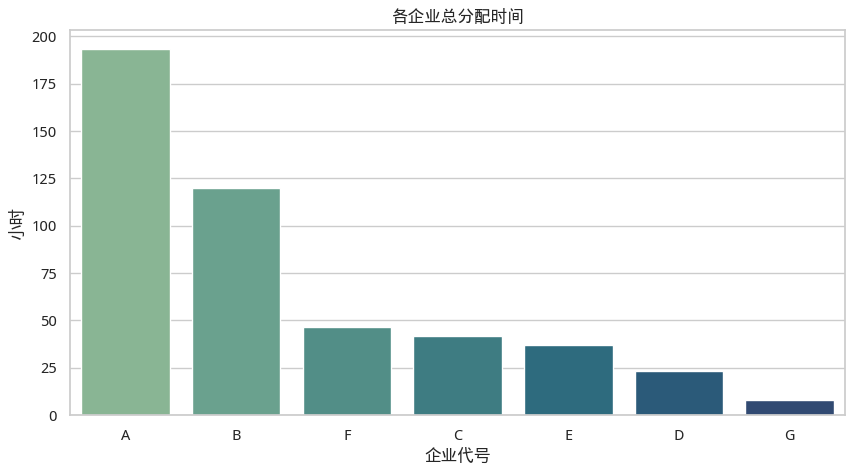

In [29]:
# 六、可视化结果（每天企业获得时间总量）
plot_assignment_distribution(assignment, enterprise_df)